In [1]:
# import packages
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
 #read PMT.xls 
data = xlrd.open_workbook('PMT.xlsx')
sheet = data.sheet_by_index(0)
nrows = sheet.nrows 
ncols = sheet.ncols 
colnames =  sheet.row_values(0) 

def readExcel():
    list =[]
    for i in range(1,nrows):        
        row = sheet.row_values(i)
        if row:
            pmt = {}
            for j in range(len(colnames)):
                pmt[colnames[j]] = row[j] 
            list.append(pmt)
    return list

In [3]:
#transform into dataframe
data = readExcel()
df = pd.DataFrame(data)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,42030.0,22.450001,22.750000,22.320000,22.719999,13.251499,351600.0
1,42031.0,22.639999,22.690001,22.530001,22.639999,13.204840,264200.0
2,42032.0,22.650000,22.730000,22.430000,22.480000,13.111522,297100.0
3,42033.0,22.500000,22.620001,22.190001,22.600000,13.181509,248600.0
4,42034.0,22.580000,22.639999,22.330000,22.510000,13.129019,362100.0
...,...,...,...,...,...,...,...
1254,43847.0,23.080000,23.170000,23.030001,23.170000,23.170000,679500.0
1255,43851.0,23.200001,23.230000,23.010000,23.170000,23.170000,1264100.0
1256,43852.0,23.219999,23.290001,23.150000,23.209999,23.209999,1066000.0
1257,43853.0,23.240000,23.280001,23.129999,23.260000,23.260000,935200.0


In [6]:
#convert float to datetime
for i in range(1,sheet.nrows):
    df.iloc[i-1:,0]=xlrd.xldate_as_datetime(sheet.cell(i,0).value, 0)

In [7]:
# calculate daily return 
df['daily_return'] = df['Adj Close'].pct_change()
df

,Date,Open,High,Low,Close,Adj Close,Volume,daily_return
0,2015-01-26 00:00:00,22.450001,22.750000,22.320000,22.719999,13.251499,351600.0,NaN
1,2015-01-27 00:00:00,22.639999,22.690001,22.530001,22.639999,13.204840,264200.0,-0.003521
2,2015-01-28 00:00:00,22.650000,22.730000,22.430000,22.480000,13.111522,297100.0,-0.007067
3,2015-01-29 00:00:00,22.500000,22.620001,22.190001,22.600000,13.181509,248600.0,0.005338
4,2015-01-30 00:00:00,22.580000,22.639999,22.330000,22.510000,13.129019,362100.0,-0.003982
...,...,...,...,...,...,...,...,...
1254,2020-01-17 00:00:00,23.080000,23.170000,23.030001,23.170000,23.170000,679500.0,0.003465
1255,2020-01-21 00:00:00,23.200001,23.230000,23.010000,23.170000,23.170000,1264100.0,0.000000
1256,2020-01-22 00:00:00,23.219999,23.290001,23.150000,23.209999,23.209999,1066000.0,0.001726
1257,2020-01-23 00:00:00,23.240000,23.280001,23.129999,23.260000,23.260000,935200.0,0.002154


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.,   2.,   0.,   2.,   2.,   4.,   6.,   4.,  17.,  24.,  48.,
         84., 168., 265., 253., 174.,  95.,  40.,  30.,   9.,   6.,   6.,
          4.,   2.,   3.,   2.,   2.,   1.]),
 array([-0.15631845, -0.15195507, -0.1475917 , -0.14322832, -0.13886495,
        -0.13450157, -0.1301382 , -0.12577482, -0.12141144, -0.11704807,
        -0.11268469, -0.10832132, -0.10395794, -0.09959457, -0.09523119,
        -0.09086781, -0.08650444, -0.08214106, -0.07777769, -0.07341431,
        -0.06905094, -0.06468756, -0.06032418, -0.05596081, -0.05159743,
        -0.04723406, -0.04287068, -0.03850731, -0.03414393, -0.02978055,
        -0.02541718, -0.0210538 , -0.01669043, -0.01232705, -0.00796368,
        -0.0036003 ,  0.00076308,  0.00512645,  0.00948983,  0.0138532 ,
         0.01821658,  0.02257995,  0.02694333,  0.03130671,  0.03567008,
 

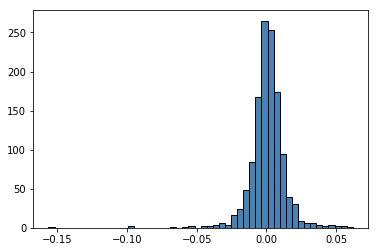

In [8]:
# histogram  
plt.hist(df['daily_return'],bins=50,color='steelblue',edgecolor='black')